##uploading the data

In [1]:
!gdown 1jfSKBXJwvH7tfDRvTYO-CMc91XFhQch1

Downloading...
From (original): https://drive.google.com/uc?id=1jfSKBXJwvH7tfDRvTYO-CMc91XFhQch1
From (redirected): https://drive.google.com/uc?id=1jfSKBXJwvH7tfDRvTYO-CMc91XFhQch1&confirm=t&uuid=6e17a986-ed4a-4dc7-b975-1c00da3da282
To: /content/Project1_data.zip
100% 297M/297M [00:11<00:00, 25.2MB/s]


In [2]:
!unzip Project1_data.zip

Archive:  Project1_data.zip
   creating: info/
  inflating: info/.DS_Store          
  inflating: __MACOSX/info/._.DS_Store  
  inflating: info/معرفي فايل خام هزينه و درامد1401.pdf  
  inflating: info/پرسشنامه هزینه درامدسال 99.pdf  
  inflating: info/پرسشنامه هزینه ودرامد خانوار-1400.pdf  
  inflating: info/معرفي فايل خام هزينه و درامد1400.pdf  
  inflating: R98.xlsx                
  inflating: __MACOSX/._R98.xlsx     
  inflating: R99.xlsx                
  inflating: __MACOSX/._R99.xlsx     
  inflating: R1400.xlsx              
  inflating: __MACOSX/._R1400.xlsx   
  inflating: R1401.xlsx              
  inflating: __MACOSX/._R1401.xlsx   
  inflating: U98.xlsx                
  inflating: __MACOSX/._U98.xlsx     
  inflating: U99.xlsx                
  inflating: __MACOSX/._U99.xlsx     
  inflating: U1400.xlsx              
  inflating: __MACOSX/._U1400.xlsx   
  inflating: U1401.xlsx              
  inflating: __MACOSX/._U1401.xlsx   


##import section

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


##DataFrames

In [66]:
# شیت های مرتبط با حقوق بازنشستگی
R98P4S03 = pd.read_excel("R98.xlsx", sheet_name='R98P4S03')
U98P4S03 = pd.read_excel("U98.xlsx", sheet_name='U98P4S03')
R99P4S03 = pd.read_excel("R99.xlsx", sheet_name='R99P4S03')
U99P4S03 = pd.read_excel("U99.xlsx", sheet_name='U99P4S03')
R1400P4S03 = pd.read_excel("R1400.xlsx", sheet_name='R1400P4S03')
U1400P4S03 = pd.read_excel("U1400.xlsx", sheet_name='U1400P4S03')
R1401P4S03 = pd.read_excel("R1401.xlsx", sheet_name='R1401P4S03')
U1401P4S03 = pd.read_excel("U1401.xlsx", sheet_name='U1401P4S03')


# شیت های مرتبط باهزینه مسکن
R98P3S04 = pd.read_excel("R98.xlsx", sheet_name='R98P3S04')
U98P3S04 = pd.read_excel("U98.xlsx", sheet_name='U98P3S04')
R99P3S04 = pd.read_excel("R99.xlsx", sheet_name='R99P3S04')
U99P3S04 = pd.read_excel("U99.xlsx", sheet_name='U99P3S04')
R1400P3S04 = pd.read_excel("R1400.xlsx", sheet_name='R1400P3S04')
U1400P3S04 = pd.read_excel("U1400.xlsx", sheet_name='U1400P3S04')
R1401P3S04 = pd.read_excel("R1401.xlsx", sheet_name='R1401P3S04')
U1401P3S04 = pd.read_excel("U1401.xlsx", sheet_name='U1401P3S04')



# شیت های مرتبط با  مشخصات محل سکونت
R98P2 = pd.read_excel("R98.xlsx", sheet_name='R98P2')
U98P2 = pd.read_excel("U98.xlsx", sheet_name='U98P2')
R99P2 = pd.read_excel("R99.xlsx", sheet_name='R99P2')
U99P2 = pd.read_excel("U99.xlsx", sheet_name='U99P2')
R1400P2 = pd.read_excel("R1400.xlsx", sheet_name='R1400P2')
U1400P2 = pd.read_excel("U1400.xlsx", sheet_name='U1400P2')
R1401P2 = pd.read_excel("R1401.xlsx", sheet_name='R1401P2')
U1401P2 = pd.read_excel("U1401.xlsx", sheet_name='U1401P2')


##How many family have rental house?

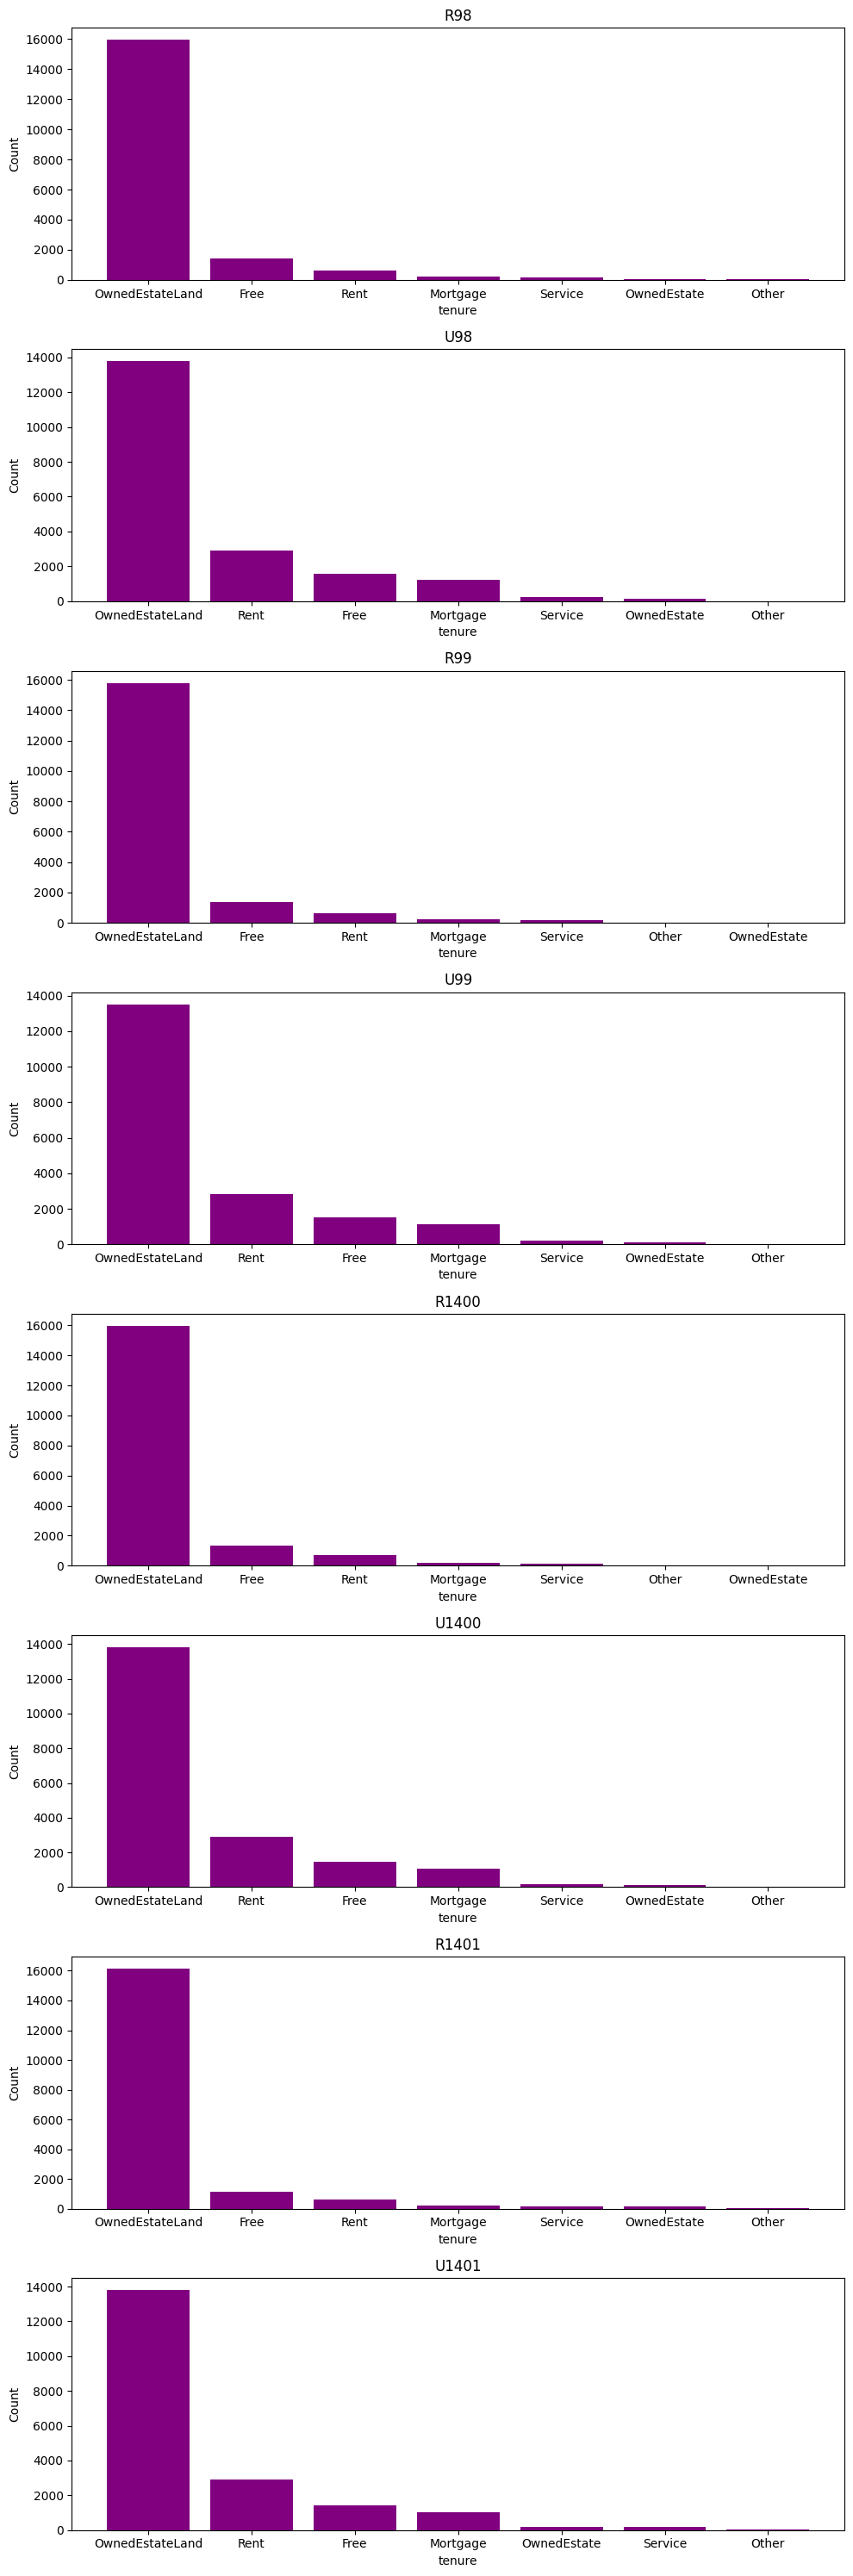

In [43]:
fig, ax = plt.subplots(8, 1, figsize=(10, 30))
dataframes = [R98P2, U98P2, R99P2, U99P2, R1400P2, U1400P2 ,R1401P2, U1401P2]

labels = ["R98", "U98", "R99", "U99", "R1400", "U1400","R1401", "U1401"]

for i, df in enumerate(dataframes):
  tenure_counts = df['tenure'].value_counts()
  ax[i].bar(tenure_counts.index, tenure_counts.values, color="purple")
  ax[i].set_title(labels[i])
  ax[i].set_xlabel('tenure')
  ax[i].set_ylabel('Count')

fig.tight_layout()
plt.show()




##income_pension

In [84]:
dataframes = [R98P4S03, U98P4S03, R99P4S03, U99P4S03, R1400P4S03, U1400P4S03 ,R1401P4S03, U1401P4S03]
labels = ["R98", "U98", "R99", "U99", "R1400", "U1400", "R1401", "U1401"]


for i, df in enumerate(dataframes):

    dataframes[i] = df[(df['income_pension'] != 0) & (pd.to_numeric(df['income_pension'], errors='coerce').notna())]


    dataframes[i]['income_pension'] = pd.to_numeric(dataframes[i]['income_pension'], errors='coerce')


    dataframes[i] = dataframes[i].dropna(subset=['income_pension'])


    dataframes[i]['income_pension'] = dataframes[i]['income_pension'].astype(int)


<ipython-input-84-6d19deb84ee5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i]['income_pension'] = pd.to_numeric(dataframes[i]['income_pension'], errors='coerce')
<ipython-input-84-6d19deb84ee5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i]['income_pension'] = pd.to_numeric(dataframes[i]['income_pension'], errors='coerce')
<ipython-input-84-6d19deb84ee5>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

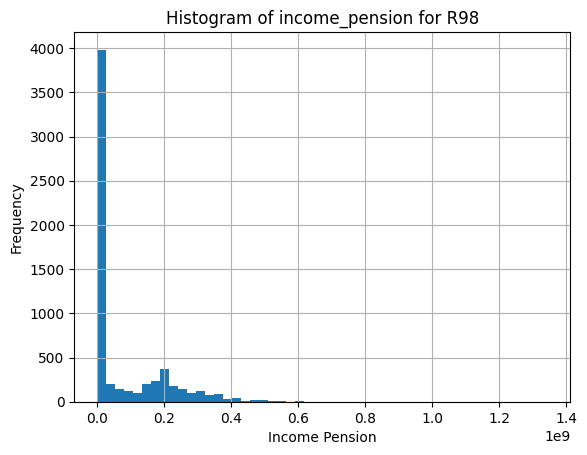

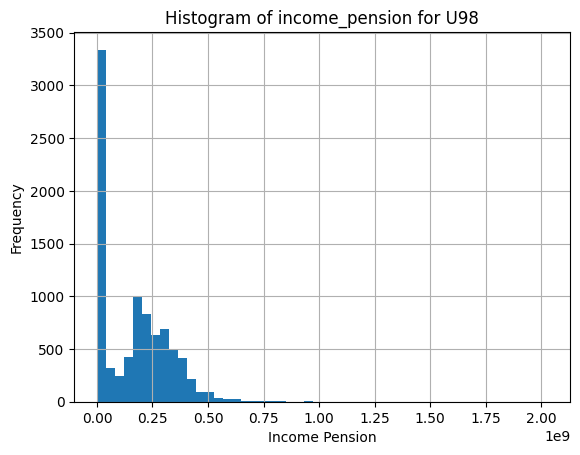

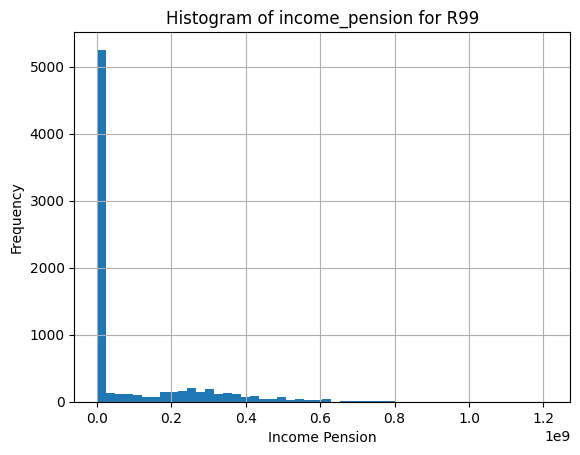

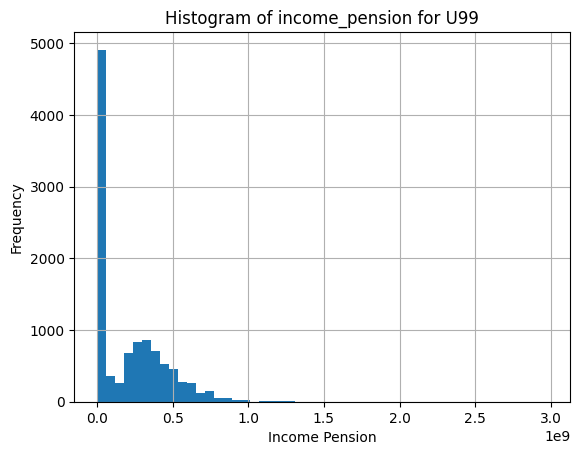

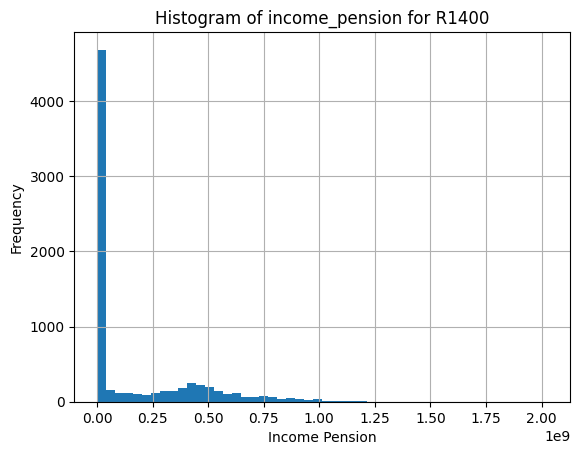

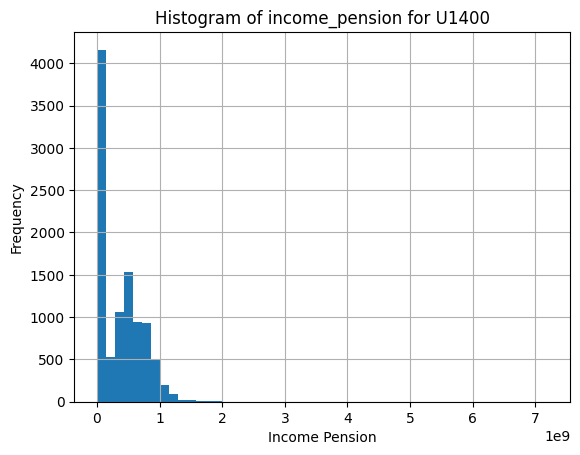

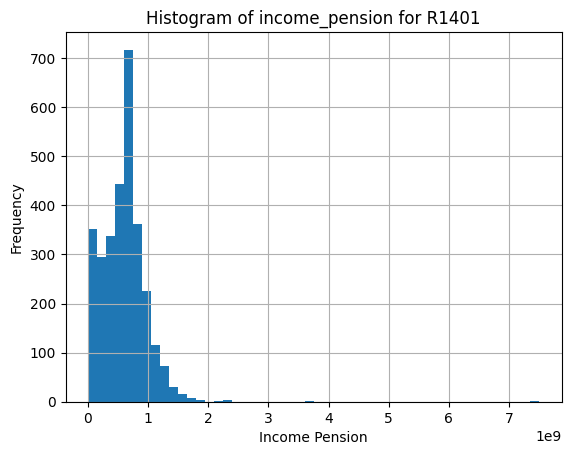

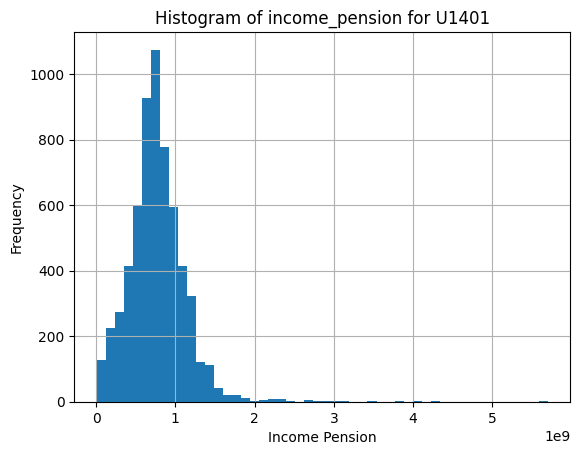

In [77]:
for i, df in enumerate(dataframes):
    df['income_pension'].hist(bins=50)
    plt.title(f"Histogram of income_pension for {labels[i]}")
    plt.xlabel('Income Pension')
    plt.ylabel('Frequency')
    plt.show()


##rents

In [98]:
dataframes = [R98P3S04, U98P3S04, R99P3S04, U99P3S04, R1400P3S04, U1400P3S04 ,R1401P3S04, U1401P3S04]
labels = ["R98", "U98", "R99", "U99", "R1400", "U1400", "R1401", "U1401"]


for i, df in enumerate(dataframes):

    dataframes[i] = df[(df['mortgage'] != 0) & (pd.to_numeric(df['mortgage'], errors='coerce').notna())]


    dataframes[i]['mortgage'] = pd.to_numeric(dataframes[i]['mortgage'], errors='coerce')


    dataframes[i] = dataframes[i].dropna(subset=['mortgage'])


    dataframes[i]['mortgage'] = dataframes[i]['mortgage'].astype(int)


<ipython-input-98-6d0f0023f48f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i]['mortgage'] = pd.to_numeric(dataframes[i]['mortgage'], errors='coerce')
<ipython-input-98-6d0f0023f48f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframes[i]['mortgage'] = pd.to_numeric(dataframes[i]['mortgage'], errors='coerce')
<ipython-input-98-6d0f0023f48f>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

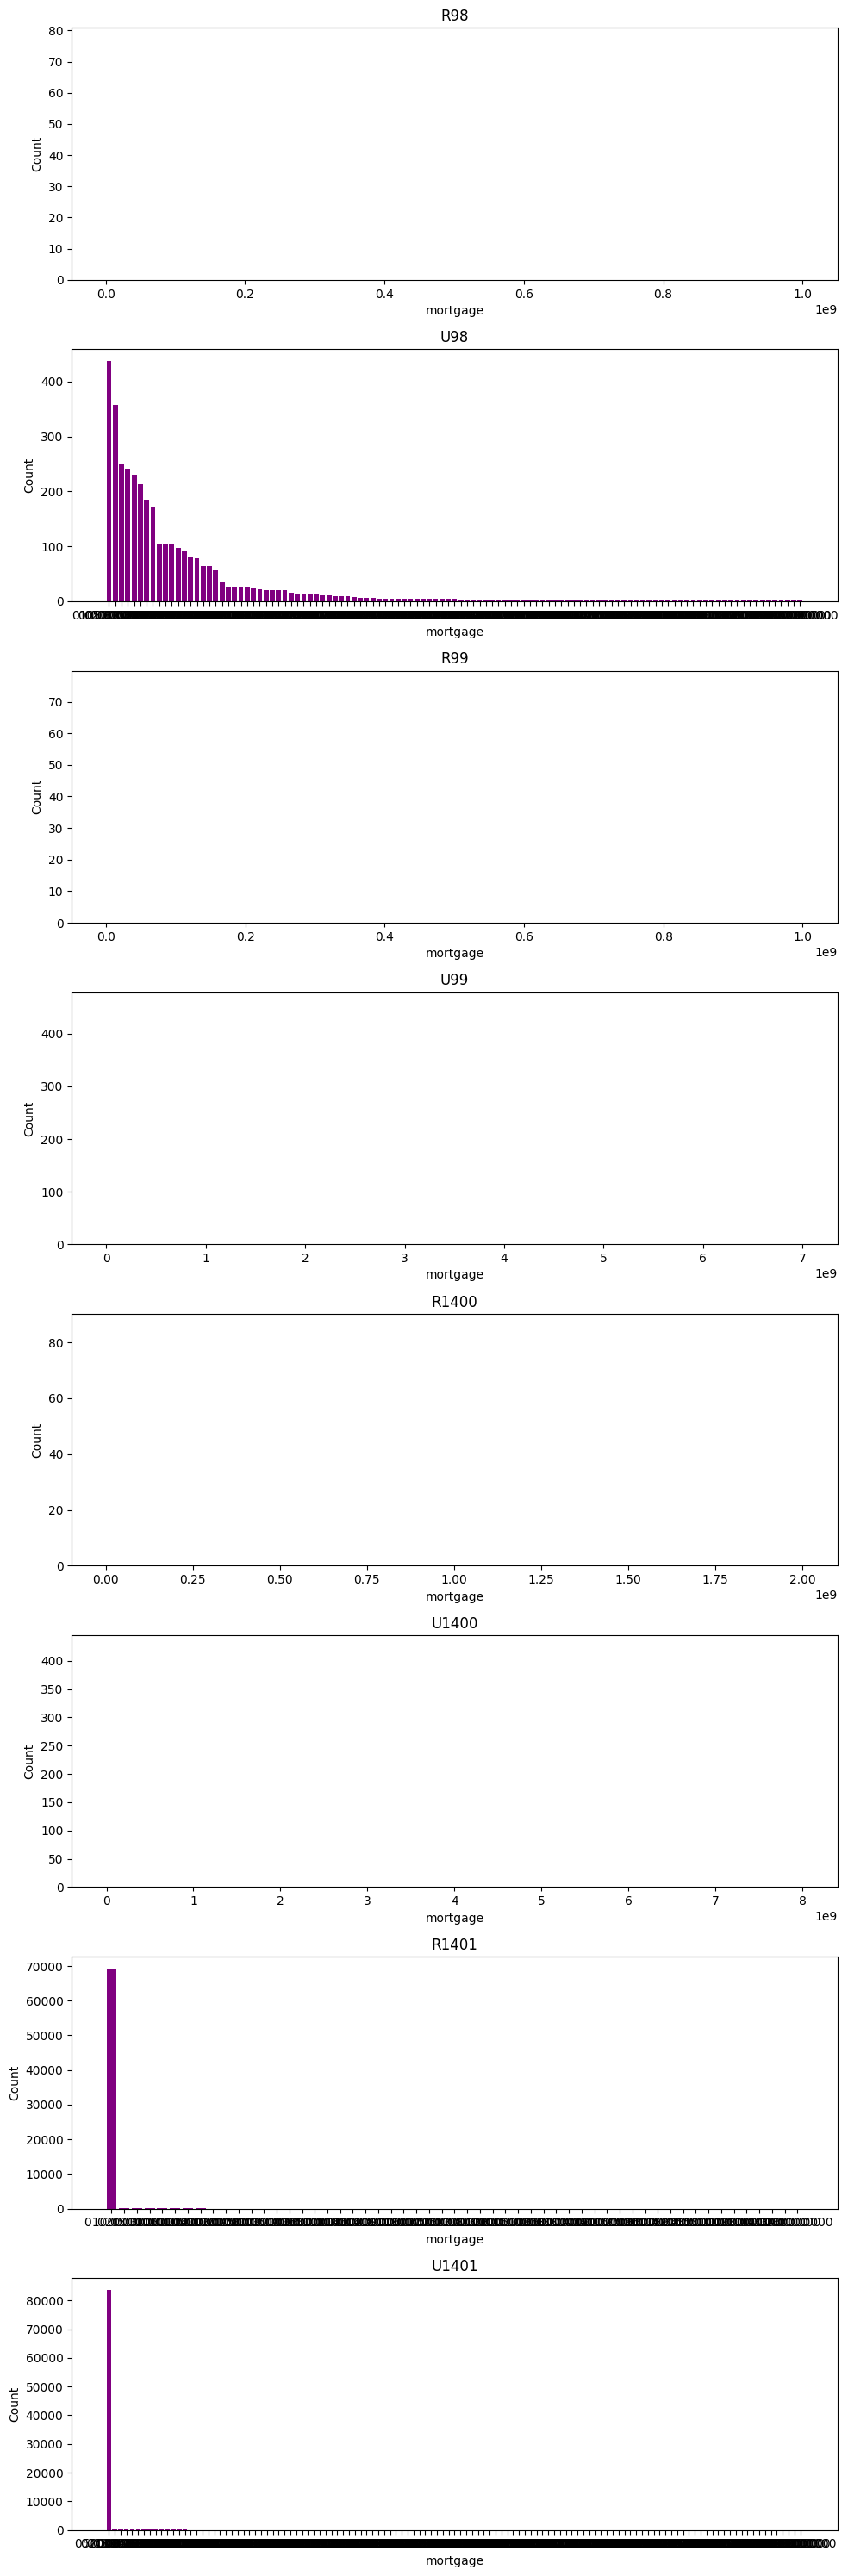

In [94]:
# try again
#time out

fig, ax = plt.subplots(8, 1, figsize=(10, 30))
dataframes = [R98P3S04, U98P3S04, R99P3S04, U99P3S04, R1400P3S04, U1400P3S04 ,R1401P3S04, U1401P3S04]
labels = ["R98", "U98", "R99", "U99", "R1400", "U1400", "R1401", "U1401"]


for i, df in enumerate(dataframes):
  mortgage_counts = df['mortgage'].value_counts()
  ax[i].bar(mortgage_counts.index, mortgage_counts.values, color="purple")
  ax[i].set_title(labels[i])
  ax[i].set_xlabel('mortgage')
  ax[i].set_ylabel('Count')

fig.tight_layout()
plt.show()




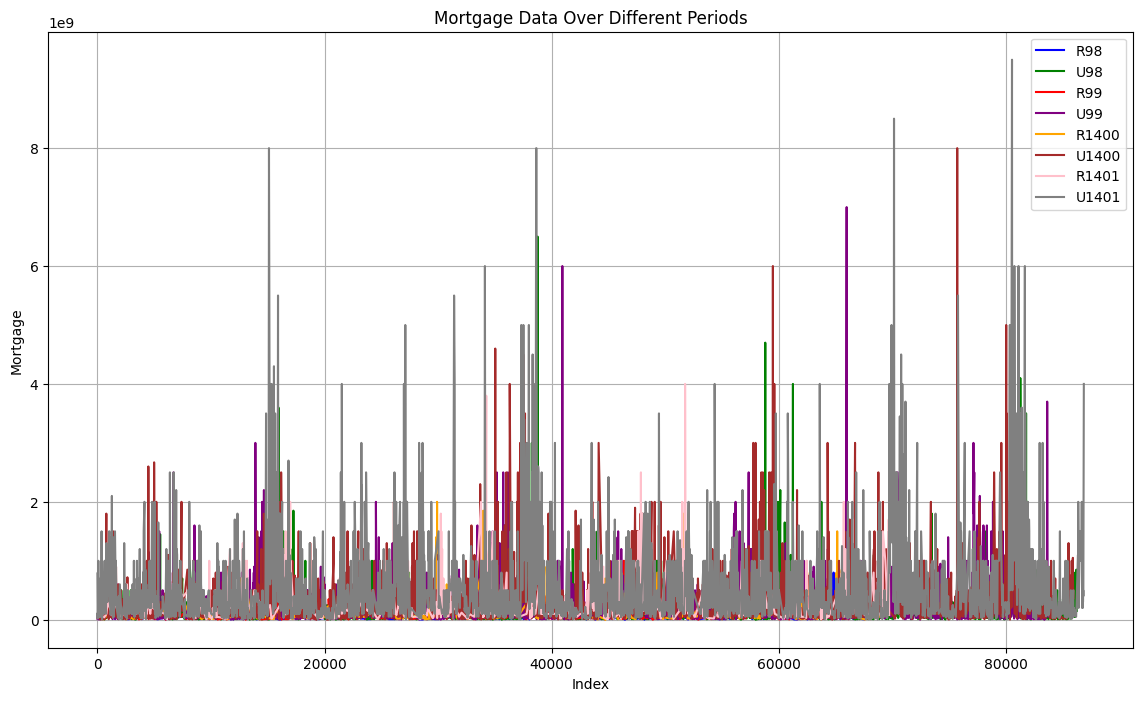

In [99]:
plt.figure(figsize=(14, 8))


colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'pink', 'gray']

for i, df in enumerate(dataframes):
    plt.plot(df.index, df['mortgage'], label=labels[i], color=colors[i])  # رسم هر سری داده

plt.xlabel('Index')
plt.ylabel('Mortgage')
plt.title('Mortgage Data Over Different Periods')
plt.legend()
plt.grid(True)
plt.show()